In [2]:
from GaiaAlertsPy import alert as gaap
import numpy as np
from astropy.stats import sigma_clip
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams['savefig.dpi'] = 550
rcParams['font.size'] = 20
plt.rc('font', family='serif')

In [3]:
%%time
table = gaap.all_sources() # query and download all Gaia Photometric Science Alerts

CPU times: user 636 ms, sys: 84.3 ms, total: 720 ms
Wall time: 11.6 s


In [ ]:
import concurrent.futures
from tqdm import tqdm
from GaiaAlertsPy import alert as gaap
import numpy as np
from tqdm import tqdm
import json

table = gaap.all_sources() # query and download all Gaia Photometric Science Alerts

path = "/Users/andytzanidakis/Desktop/gdr3/gaia_alerts_2024/"

def process_source(source):
    name = source['Name']
    data_store = {}
    
    try:
        alert_lc = gaap.GaiaAlert(name).query_lightcurve_alert()
        spec = gaap.GaiaAlert(name).query_bprp_history()

        time, mag, mag_err = alert_lc['JD'].data, alert_lc['mag_G'].data, alert_lc['mag_G_error'].data
        data_store['name'] = name.tolist()
        data_store['JD'] = time.tolist()
        data_store['mag'] = mag.tolist()
        data_store['mag_err'] = mag_err.tolist()
        data_store['spec_bp'] = spec['bp'].data.tolist()
        data_store['spec_rp'] = spec['rp'].data.tolist()
        data_store['spec_jd'] = spec['JD'].data.tolist()

        jo = json.dumps(data_store)

        with open(f"{path}{name}-spec.json", "w") as outfile:
            outfile.write(jo)
    except Exception as e:
        # Handle exceptions if needed
        print(f"Error processing {name}: {str(e)}")

# Assuming `table` is your iterable data
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    futures = []
    for source in tqdm(table):
        future = executor.submit(process_source, source)
        futures.append(future)

    # Wait for all futures to complete
    concurrent.futures.wait(futures)


100%|████████████████████████████████████| 3580/3580 [00:00<00:00, 33818.18it/s]


Error processing Gaia22epe: unexpected EOF while parsing (<unknown>, line 0)
Error processing Gaia22eoq: len() of unsized object
Error processing Gaia22eok: len() of unsized object
Error processing Gaia22enu: unexpected EOF while parsing (<unknown>, line 0)
Error processing Gaia22end: len() of unsized object
Error processing Gaia22emg: len() of unsized object
Error processing Gaia22elh: len() of unsized object
Error processing Gaia22ekh: len() of unsized object
Error processing Gaia22ejs: unexpected EOF while parsing (<unknown>, line 0)
Error processing Gaia22eiv: len() of unsized object
Error processing Gaia22ehf: len() of unsized object
Error processing Gaia22eex: len() of unsized object
Error processing Gaia22eev: unexpected EOF while parsing (<unknown>, line 0)
Error processing Gaia22edp: len() of unsized object
Error processing Gaia22ecw: len() of unsized object
Error processing Gaia22eaf: len() of unsized object
Error processing Gaia22dxt: len() of unsized object
Error processing

In [ ]:
for source in tqdm(table):
    name = source['Name']
    
    try:
        data_store = {}
        alert_lc = gaap.GaiaAlert(name).query_lightcurve_alert()
        spec = gaap.GaiaAlert(name).query_bprp_history()

        time, mag, mag_err = alert_lc['JD'].data, alert_lc['mag_G'].data, alert_lc['mag_G_error'].data
        data_store['name'] = name.tolist()
        data_store['JD'] = time.tolist()
        data_store['mag'] = mag.tolist()
        data_store['mag_err'] = mag_err.tolist()
        data_store['spec_bp'] = spec['bp'].data.tolist()
        data_store['spec_rp'] = spec['rp'].data.tolist()
        data_store['spec_jd'] = spec['JD'].data.tolist()

        jo = json.dumps(data_store)

        with open(f"{path}{name}-spec.json", "w") as outfile:
            outfile.write(jo)
    except:
        continue

  1%|▎                                   | 245/24758 [36:21<29:12:34,  4.29s/it]

In [49]:
with open(f"{path}Gaia24anz-spec.json", "r") as openfile:
    jre = json.load(openfile)

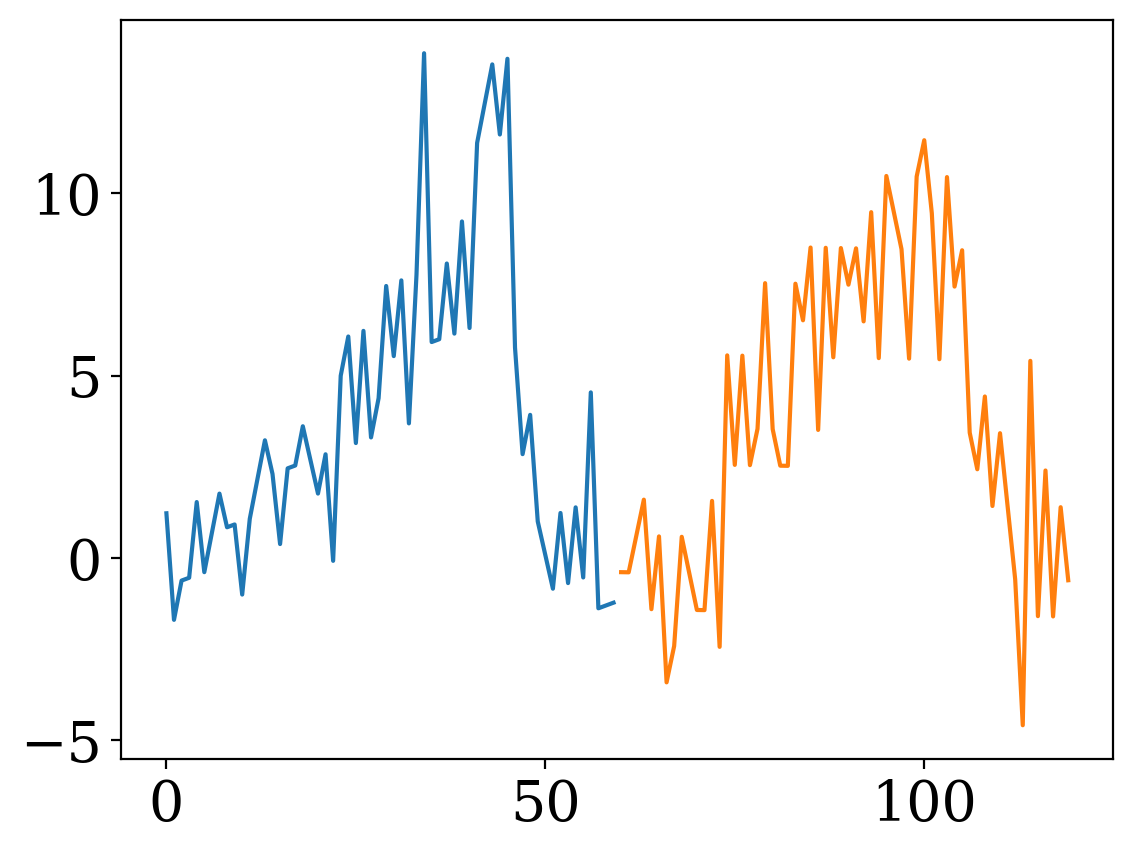

In [57]:
plt.plot(range(0, 60), np.array(jre['spec_bp'])[0])
plt.plot(range(60, 120), np.array(jre['spec_rp'])[0])

array(['0', 'AGN', 'BL Lac', 'CCSN', 'CV', 'ILRT', 'LBV', 'Nova', 'Other',
       'QSO', 'RCrB', 'SLSN', 'SN', 'SN I', 'SN I-pec', 'SN II', 'SN II?',
       'SN IIL', 'SN IIP', 'SN IIb', 'SN IIn', 'SN IIn-pec', 'SN Ia',
       'SN Ia-CSM', 'SN Ia-pec', 'SN Iax', 'SN Ib', 'SN Ib/c', 'SN Ibn',
       'SN Ic', 'SN Ic-BL', 'SN Ic-pec', 'SN imposter', 'SSO', 'TDE',
       'ULENS', 'Varstar', 'XRB', 'YSO', 'dK', 'dM', 'galaxy', 'star',
       'symbiotic star', 'unknown'], dtype='<U14')

In [10]:
%%time
target_id = "Gaia19asz" 
alert_lc = gaap.GaiaAlert(target_id).query_lightcurve_alert()

CPU times: user 84.7 ms, sys: 4.72 ms, total: 89.4 ms
Wall time: 2.53 s


In [16]:
alert_lc

JD,mag_G,mag_G_error
float64,float64,float64
2456965.1249305555,16.67,0.014975730811871202
2456965.198935185,16.55,0.014616392937847777
2457023.350798611,16.76,0.01525840216332952
2457023.4248032407,16.81,0.015420801849645116
2457061.906712963,16.72,0.01513128855644652
2457062.0828703702,16.6,0.014763820347969414
2457088.907002315,16.27,0.013843123621371412
...,...,...
2460161.355185185,16.53,0.014558293638222253


In [12]:
%%time
# Now we can even query the BP_RP information
color_lc = gaap.GaiaAlert(target_id).query_bprp_history()

CPU times: user 167 ms, sys: 29.2 ms, total: 196 ms
Wall time: 201 ms


In [40]:
color_lc

Date,JD,Average Mag.,order,bp,rp,Name
str19,float64,float64,int64,float64[60],float64[60],str9
2014-11-03 14:59:54,2456965.12,16.67,0,-2.9666 .. -0.4334,-0.9859 .. 3.5859,Gaia19asz
2014-12-31 20:25:09,2457023.35,16.76,1,-0.2026 .. 1.2026,-3.3323 .. -0.0677,Gaia19asz
2014-12-31 22:11:43,2457023.42,16.81,2,-1.3605 .. -2.2395,-1.814 .. -1.386,Gaia19asz
2015-02-08 09:45:40,2457061.91,16.72,3,-2.7851 .. 1.9851,-2.2043 .. -4.1957,Gaia19asz
2015-02-08 13:59:20,2457062.08,16.6,4,-2.0487 .. -0.5513,2.8007 .. -0.0007,Gaia19asz
2015-03-07 09:46:05,2457088.91,16.27,5,2.4319 .. 1.5681,1.8284 .. 5.9716,Gaia19asz
2015-04-13 03:23:58,2457125.64,16.54,6,-2.5041 .. -2.0959,-2.8781 .. -2.7219,Gaia19asz
...,...,...,...,...,...,...
2022-04-14 03:04:56,2459683.63,16.37,88,3.4015 .. -1.2015,1.1075 .. -3.5075,Gaia19asz


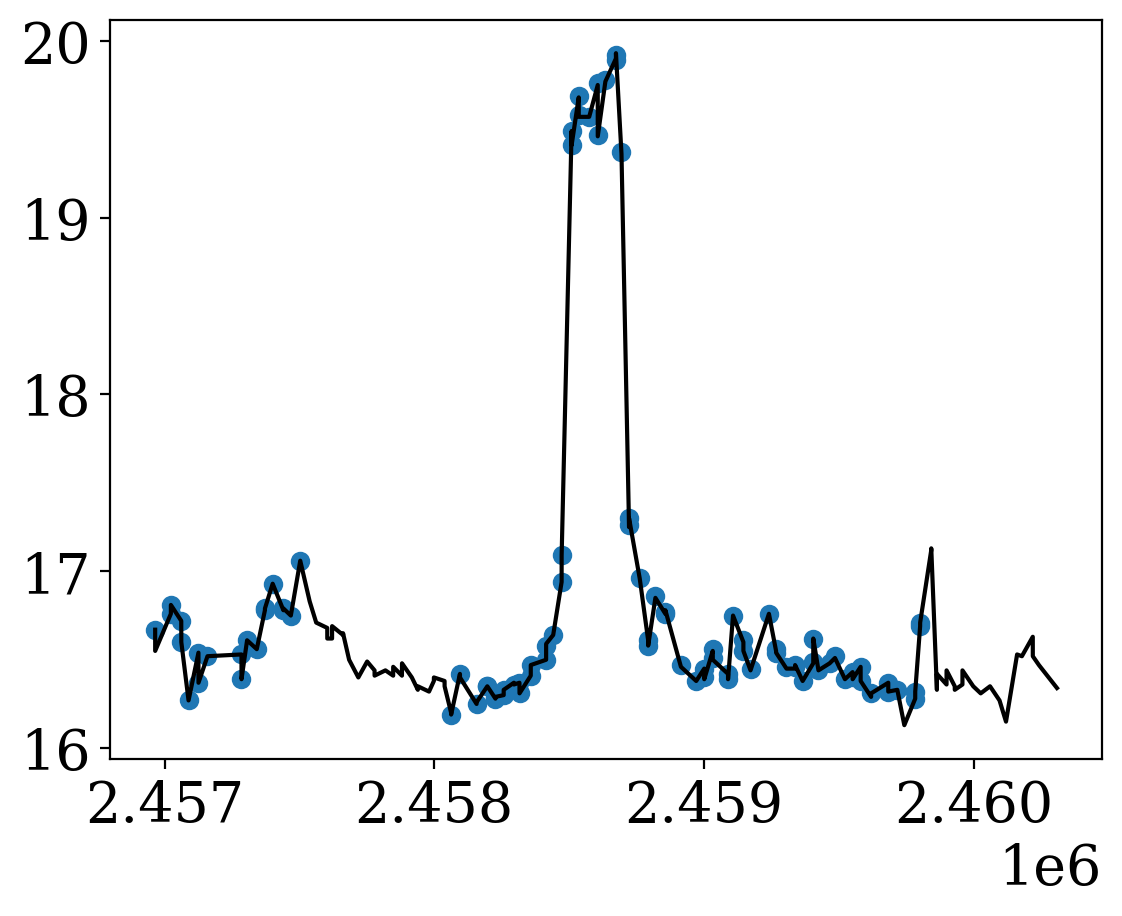

In [23]:
plt.scatter(color_lc['JD'], color_lc['Average Mag.']
           )
plt.plot(alert_lc['JD'], alert_lc['mag_G'], color='k')